<a href="https://colab.research.google.com/github/MohamedSelim-dev/hotel_satisfication_perdiction/blob/main/hotel_satisfy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1-Load data

In [121]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
#path
path = "/content/drive/MyDrive/mlprojects/Hotel_Satisfaction_Score.csv"
df = pd.read_csv(path)
df.head(10)

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
5,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied
6,82113,Male,47,academic,Personal Travel,Individual/Couple,2,4,2,3,2,2,2,3,5,2,neutral or dissatisfied
7,96462,Female,52,aviation,Group Travel,Group bookings,4,3,4,4,5,5,5,4,5,4,satisfied
8,79485,Female,41,tourism,Group Travel,Group bookings,1,2,2,2,4,3,1,4,1,2,neutral or dissatisfied
9,65725,Male,20,academic,Group Travel,Individual/Couple,3,3,3,4,2,3,2,4,3,2,neutral or dissatisfied


In [123]:
df.columns

Index(['id', 'Gender', 'Age', 'purpose_of_travel', 'Type of Travel',
       'Type Of Booking', 'Hotel wifi service',
       'Departure/Arrival  convenience', 'Ease of Online booking',
       'Hotel location', 'Food and drink', 'Stay comfort',
       'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction'],
      dtype='object')

# 2-EDA

In [124]:
df.shape

(103904, 17)

# 2.1-Check missing value

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

In [126]:
#drop id column
df.drop('id',axis=1,inplace=True)

In [127]:
df.isna().sum()

Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

In [128]:
df['Type Of Booking'].value_counts()

Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: Type Of Booking, dtype: int64

**Data** that is not defined is 7494 or about 5% - 7%.We can drop the data because the percentage is small or handel it.

In [129]:
df = df.replace(['Not defined'], np.nan)

In [130]:
df.dropna(inplace=True)

In [131]:
df['Type Of Booking'].value_counts()

Group bookings       49665
Individual/Couple    46745
Name: Type Of Booking, dtype: int64

In [132]:
df.shape

(96410, 16)

# 2.2- Check Outlier

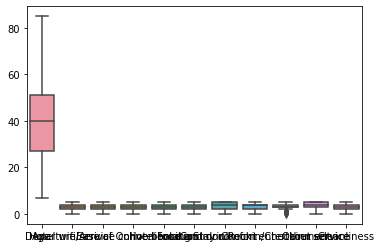

In [133]:
sns.boxplot(data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


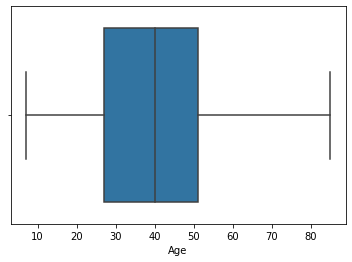

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


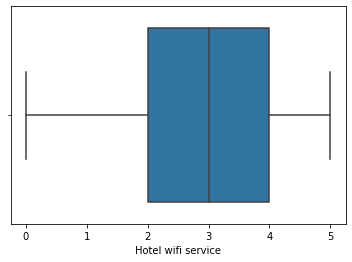

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


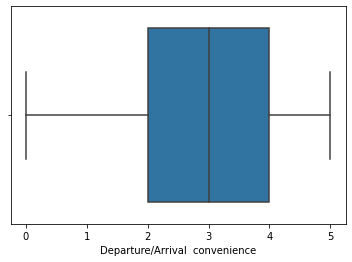

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


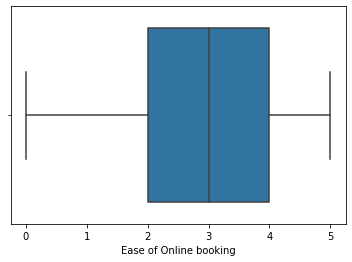

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


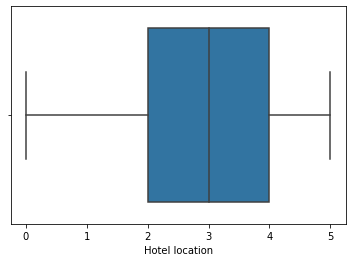

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


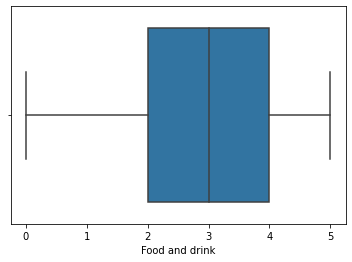

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


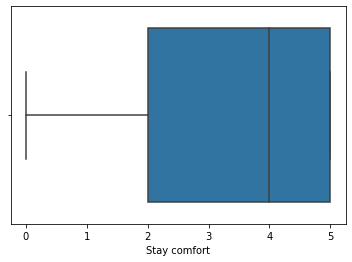

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


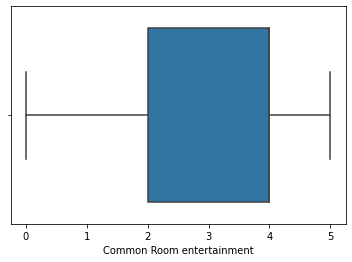

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


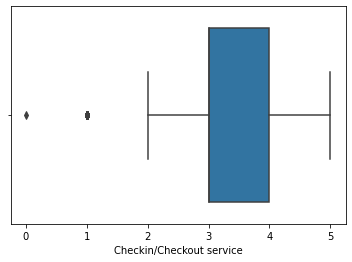

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


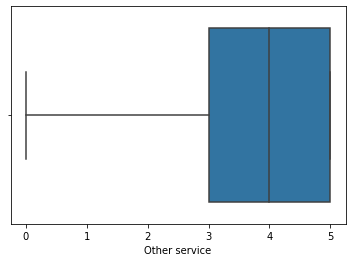

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


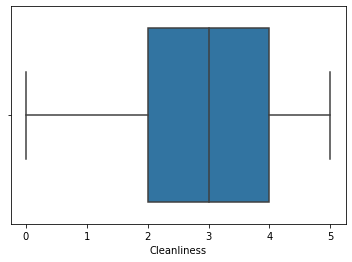

In [134]:
numierc_columns=df.select_dtypes(include=np.number).columns.tolist()

for col in numierc_columns:
   sns.boxplot(df[col])
   plt.show()

Only outliers in the checkin/checkout column which are also small in number with a scale of 0-5.

# Check Class target if imbalanced

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


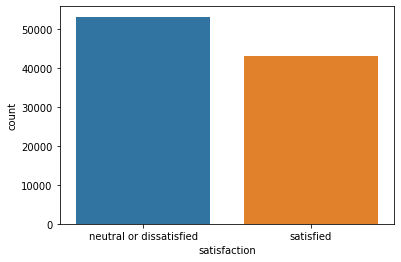

In [135]:
sns.countplot(df['satisfaction'])

In [136]:
df['satisfaction'].value_counts()

neutral or dissatisfied    53229
satisfied                  43181
Name: satisfaction, dtype: int64

**the distribution of data show that there is an imbalanced data**

# 2.3- Categorical data

1- Gender.

2- Porpose_of_travel.

3- Type_of_Travel.

4- Type_of_Booking.



1-Gender column, the number of Satisfied and Dissatisfied is almost the same.

2-Purpose of travel column, the highest number of Satisfied and Dissatisfied is in the type of tourism trip. This can be due to the fact that travel in terms of tourism is the most numerous compared to others.

3-type of travel column, the level of satisfaction is high for group-type trips, which is around 40k while on personal trips it is only around 2500.

4-type of booking column, the level of satisfaction is high at the level of group bookings, which is around 34k, it is directly proportional to the type of group travel, while for individual/couple booking types that satisfy only about 9000, it is also directly proportional to the type of personal travel.



## Gender

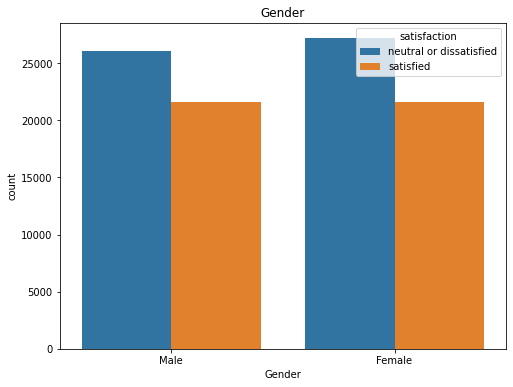

In [137]:
plt.figure(figsize=[8,6])
plt.title('Gender')
sns.countplot(data=df, x='Gender', hue='satisfaction')

## Porpose_of_travel

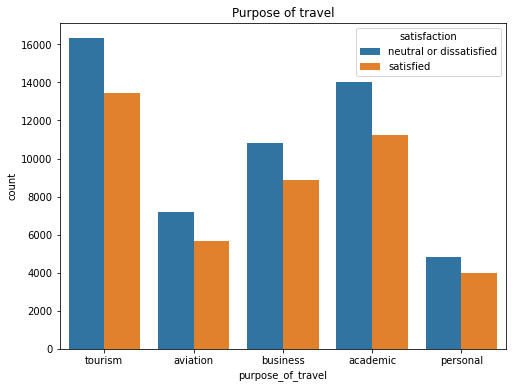

In [138]:
plt.figure(figsize=[8,6])
plt.title('Purpose of travel')
sns.countplot(data=df, x='purpose_of_travel', hue='satisfaction')

## Type_of_Travel

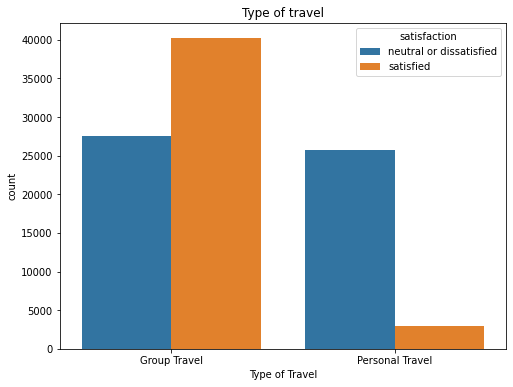

In [139]:
plt.figure(figsize=[8,6])
plt.title('Type of travel')
sns.countplot(data=df, x='Type of Travel', hue='satisfaction')

## Type_of_Booking

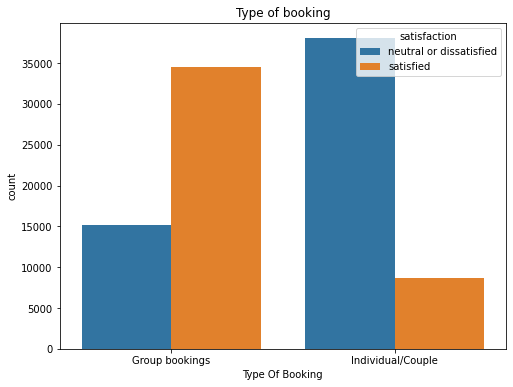

In [140]:
plt.figure(figsize=[8,6])
plt.title('Type of booking')
sns.countplot(data=df, x='Type Of Booking', hue='satisfaction')

# 2.4- Numeric data

## age

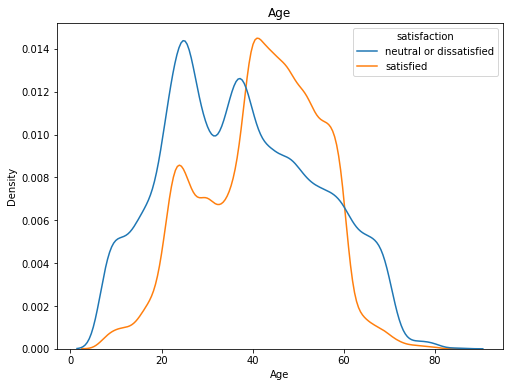

In [141]:
plt.figure(figsize=[8,6])
plt.title('Age')
sns.kdeplot(data=df, x='Age', hue='satisfaction')

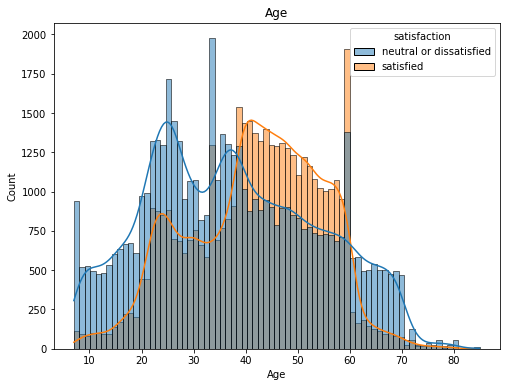

In [142]:
plt.figure(figsize=[8,6])
plt.title('Age')
sns.histplot(data=df , x='Age',kde=True,hue=df['satisfaction'])

the highest level of satisfaction is in the range of 40-60 while under the age of 40 the average level of satisfaction is dissatisfied and also over the age of 60 feel dissatisfied.

## age type

In [143]:
def age_type(age):
  if age < 40:
    return 'Young'
  elif age > 60:
    return 'Old'
  else:
    return 'Mid-Old' 

df['age_type']= df['Age'].apply(lambda age: age_type(age))

In [144]:
df.head()

,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,age_type
1,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied,Young
2,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied,Young
3,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied,Young
4,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied,Old
5,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied,Young


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


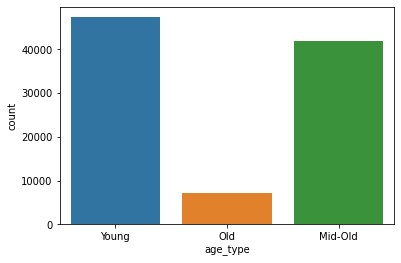

In [145]:
sns.countplot(df['age_type'])

In [146]:
df['age_type'].value_counts()

Young      47307
Mid-Old    42004
Old         7099
Name: age_type, dtype: int64

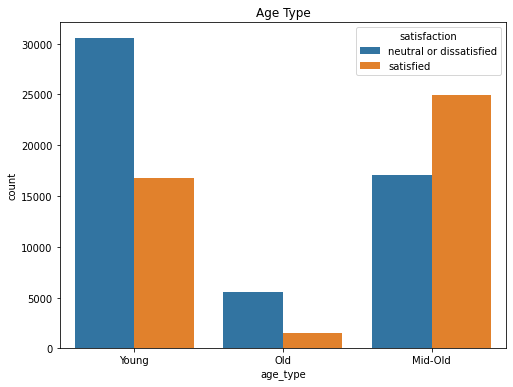

In [147]:
plt.figure(figsize=[8,6])
plt.title('Age Type')
sns.countplot(data=df, x='age_type', hue='satisfaction')

In [148]:
#all data without 'mid-old' age type will focuse on increace their satisfiy
df_not_midold = df[df['age_type'] != 'Mid-Old']
df_not_midold.shape

(54406, 17)

## age-type and wifi service

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


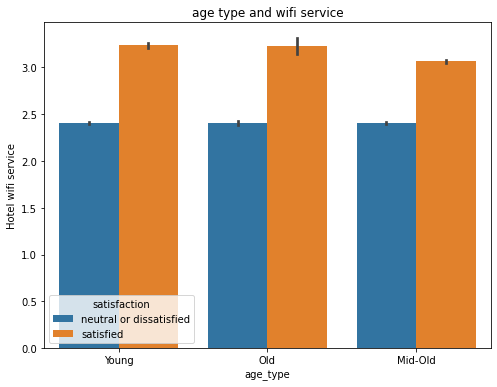

In [149]:
plt.figure(figsize=[8,6])
plt.title('age type and wifi service')
sns.barplot(df['age_type'], df['Hotel wifi service'], hue=df['satisfaction'])

## age-type and entertainment

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


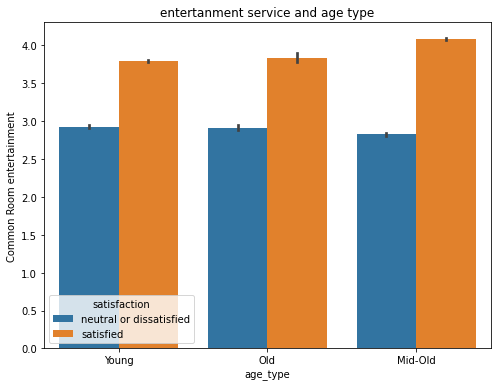

In [150]:
plt.figure(figsize=[8,6])
plt.title('entertanment service and age type')
sns.barplot(df['age_type'], df['Common Room entertainment'], hue=df['satisfaction'])

## age type and comfort

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


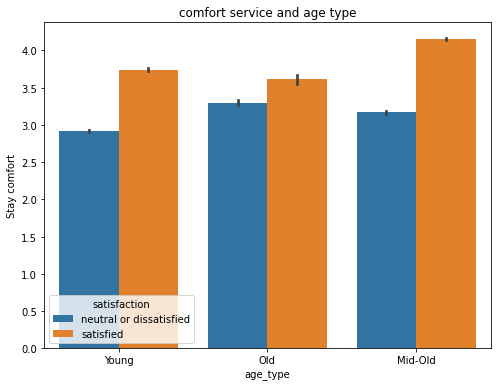

In [151]:
plt.figure(figsize=[8,6])
plt.title('comfort service and age type')
sns.barplot(df['age_type'], df['Stay comfort'], hue=df['satisfaction'])

## age type and food/drink

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


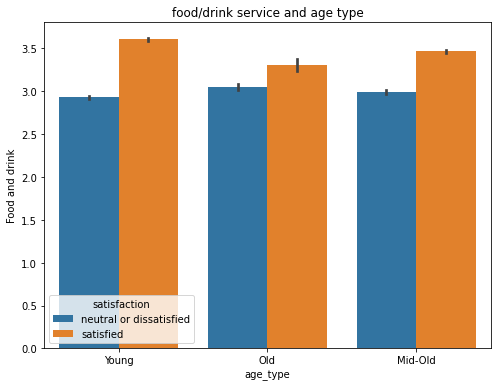

In [152]:
plt.figure(figsize=[8,6])
plt.title('food/drink service and age type')
sns.barplot(df['age_type'], df['Food and drink'], hue=df['satisfaction'])

## age type and cleanliness

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


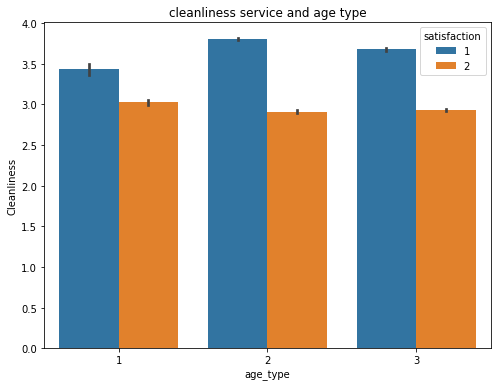

In [175]:
plt.figure(figsize=[8,6])
plt.title('cleanliness service and age type')
sns.barplot(df['age_type'], df['Cleanliness'], hue=df['satisfaction'])

# 2.5 Answer Questions

### Q1-What are the ages of customers who are not satisfied with the services provided?

### the highest level of satisfaction is in the range of 40-60 while under the age of 40 the average level of satisfaction is dissatisfied and also over the age of 60 feel dissatisfied.


### Q2-What is the gender of customers who are not satisfied with the service?


### The number of Satisfied and Dissatisfied is almost the same.


### Q3-what is the most important variable that makes customers satisfied?


### food and drink , wifi , entertainment


### Q4-Do customers coming with groups give a lower score on the service satisfaction scale?

### the customer comes personal give a lower score than comes in groups


### Q5-Does tourism customer satisfaction increase from business customers?

### the number of tourism customers satisfied more than business customers.



# 2.6 handel categorical data

# 2.6.1 Label ecoding

Gender

age_group

satisfaction

In [154]:
df['Gender'].value_counts()

Female    48785
Male      47625
Name: Gender, dtype: int64

In [155]:
encoder = {'Male':1,'Female':2}

In [156]:
df['Gender'] = df['Gender'].map(encoder)

In [157]:
df['age_type'].value_counts()

Young      47307
Mid-Old    42004
Old         7099
Name: age_type, dtype: int64

In [158]:
encoder = {'Old':1 ,'Mid-Old':2,'Young':3}

In [159]:
df['age_type'] =df['age_type'].map(encoder)

In [160]:
df['satisfaction'].value_counts()

neutral or dissatisfied    53229
satisfied                  43181
Name: satisfaction, dtype: int64

In [161]:
encoder = {'satisfied':1,'neutral or dissatisfied':2}

In [162]:
df['satisfaction']=df['satisfaction'].map(encoder)

# 2.6.2 One_hot encoder

purpose_of_travel

Type of Travel

Type Of Booking

In [163]:
df = pd.get_dummies(data=df,columns=['purpose_of_travel','Type of Travel','Type Of Booking'],drop_first=True)

In [164]:
df.head()

,Gender,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,age_type,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple
1,1,25,3,2,3,3,1,1,1,1,4,1,2,3,0,0,0,1,0,0
2,2,26,2,2,2,2,5,5,5,4,4,5,1,3,0,0,0,1,0,0
3,2,25,2,5,5,5,2,2,2,1,4,2,2,3,0,0,0,1,0,0
4,1,61,3,3,3,3,4,5,3,3,3,3,1,1,1,0,0,0,0,0
5,2,26,3,4,2,1,1,1,1,4,4,1,2,3,0,1,0,0,1,1


# 3 Split data input / output

In [165]:
X =df.drop('satisfaction',axis=1)
y=df['satisfaction']

# 4 split train & test


In [166]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [167]:
y_train.value_counts()

2    42583
1    34545
Name: satisfaction, dtype: int64

In [168]:
y_test.value_counts()

2    10646
1     8636
Name: satisfaction, dtype: int64

# 5 handel imbalanced 

## SMOTE

In [169]:
! pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [170]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_train_smote,y_train_smote=smote.fit_resample(x_train,y_train)

In [171]:
x_train_smote

,Gender,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,age_type,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Personal Travel,Type Of Booking_Individual/Couple
0,1,11,5,4,5,5,5,5,5,5,5,5,3,1,0,0,0,0,0
1,1,66,1,2,1,4,4,4,4,2,3,4,1,1,0,0,0,1,1
2,1,38,3,3,3,5,4,4,4,5,4,4,3,1,0,0,0,0,0
3,1,39,0,0,0,2,4,5,4,5,4,3,3,0,0,0,1,0,0
4,1,28,3,3,3,3,4,4,4,5,5,4,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85161,1,59,1,1,1,1,2,5,4,5,4,4,2,0,0,0,1,0,0
85162,2,36,4,4,4,4,2,5,3,3,3,3,3,0,0,0,0,0,0
85163,1,45,2,2,2,2,5,4,4,3,4,3,2,0,1,0,0,0,0
85164,1,40,1,1,1,1,3,4,3,4,3,5,2,0,0,0,0,0,0


In [172]:
y_train_smote.value_counts()

1    42583
2    42583
Name: satisfaction, dtype: int64

In [173]:
x_train_smote.duplicated().sum()

3690

In [174]:
#sns.pairplot(data=df,hue='satisfaction')